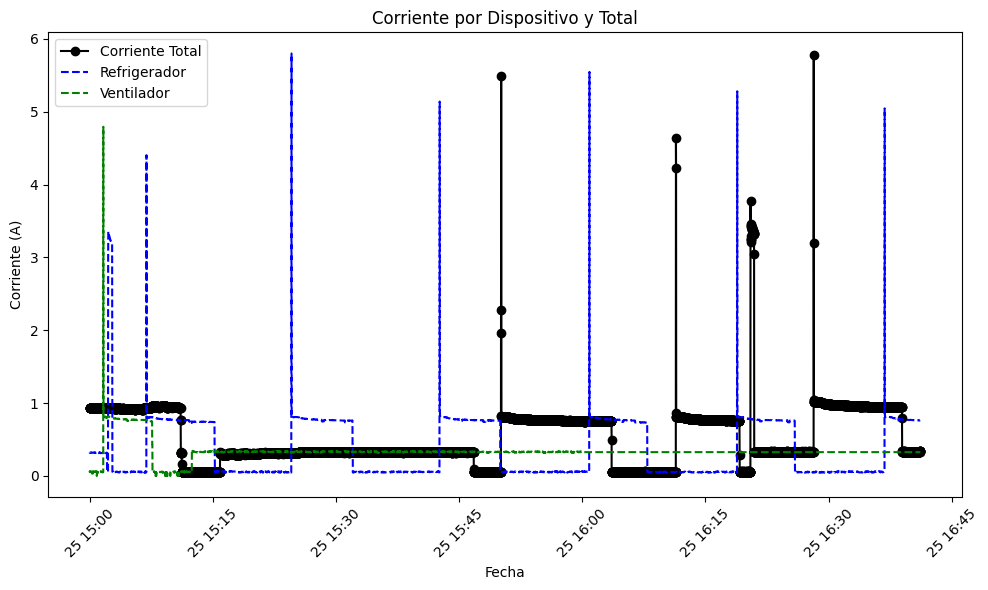

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos desde CSV
df_total = pd.read_csv('Datos_generales_Corriente_linea1.csv')  # Corriente total
df_ventilador = pd.read_csv('ventilador.csv')  # Corriente del ventilador (sin fecha)
df_refrigerador = pd.read_csv('refrigerador.csv')  # Corriente del refrigerador (sin fecha)

# Asegurarse de que la columna de fecha y corriente total está correctamente nombrada
df_total = df_total.rename(columns={'Corriente_linea1': 'corriente_total'})

# Convertir la columna de fecha al formato datetime
df_total['fecha'] = pd.to_datetime(df_total['fecha'], format='%Y-%m-%d_%H-%M-%S')

# Obtener los valores de corriente para el ventilador y refrigerador
corriente_ventilador = df_ventilador['Corriente_linea1'].values  # Asumiendo que hay solo una columna de corriente
corriente_refrigerador = df_refrigerador['Corriente_linea1'].values

# Ajustar las longitudes si no coinciden con los datos de corriente total (repetir los valores)
longitud_total = len(df_total)
corriente_ventilador = corriente_ventilador[:longitud_total] if len(corriente_ventilador) >= longitud_total else np.pad(corriente_ventilador, (0, longitud_total - len(corriente_ventilador)), 'edge')
corriente_refrigerador = corriente_refrigerador[:longitud_total] if len(corriente_refrigerador) >= longitud_total else np.pad(corriente_refrigerador, (0, longitud_total - len(corriente_refrigerador)), 'edge')

# Graficar los resultados
plt.figure(figsize=(10,6))

# Graficar la corriente total con la fecha
plt.plot(df_total['fecha'], df_total['corriente_total'], label="Corriente Total", color="black", marker='o')

# Graficar la corriente del refrigerador y ventilador (sin fecha específica)
plt.plot(df_total['fecha'], corriente_refrigerador, label="Refrigerador", color="blue", linestyle='--')
plt.plot(df_total['fecha'], corriente_ventilador, label="Ventilador", color="green", linestyle='--')

# Añadir etiquetas y leyenda
plt.xlabel("Fecha")
plt.ylabel("Corriente (A)")
plt.title("Corriente por Dispositivo y Total")
plt.xticks(rotation=45)  # Rotar las etiquetas de la fecha para mejorar la legibilidad
plt.legend()

# Mostrar gráfica
plt.tight_layout()
plt.show()


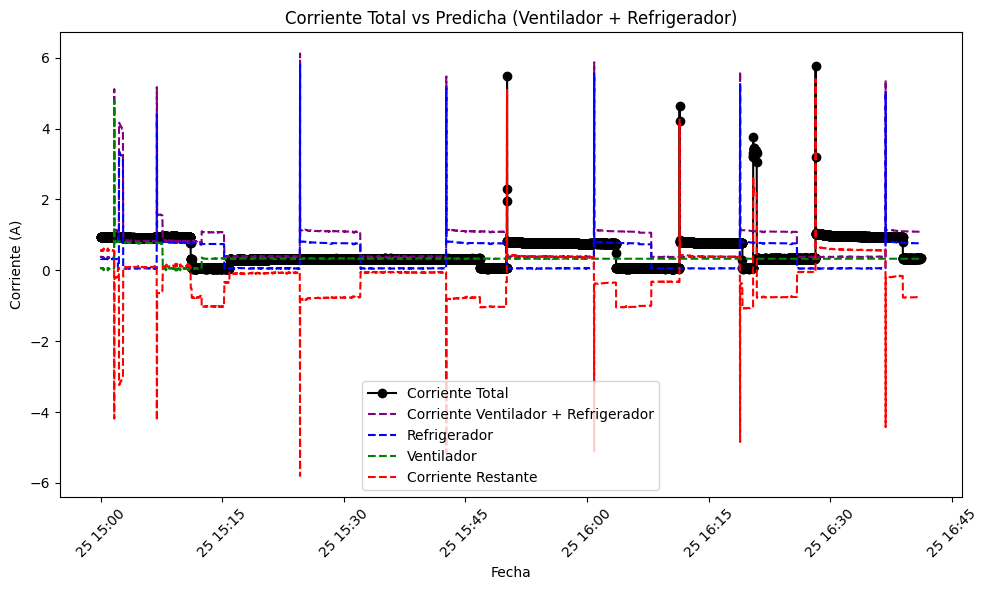

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer los datos desde CSV
df_total = pd.read_csv('Datos_generales_Corriente_linea1.csv')  # Corriente total
df_ventilador = pd.read_csv('ventilador.csv')  # Corriente del ventilador (sin fecha)
df_refrigerador = pd.read_csv('refrigerador.csv')  # Corriente del refrigerador (sin fecha)

# Asegurarse de que la columna de fecha y corriente total está correctamente nombrada
df_total = df_total.rename(columns={'Corriente_linea1': 'corriente_total'})

# Convertir la columna de fecha al formato datetime
df_total['fecha'] = pd.to_datetime(df_total['fecha'], format='%Y-%m-%d_%H-%M-%S')

# Obtener los valores de corriente para el ventilador y refrigerador
corriente_ventilador = df_ventilador['Corriente_linea1'].values  # Valores sin fecha
corriente_refrigerador = df_refrigerador['Corriente_linea1'].values

# Ajustar las longitudes si no coinciden con los datos de corriente total (repetir los valores)
longitud_total = len(df_total)
corriente_ventilador = corriente_ventilador[:longitud_total] if len(corriente_ventilador) >= longitud_total else np.pad(corriente_ventilador, (0, longitud_total - len(corriente_ventilador)), 'edge')
corriente_refrigerador = corriente_refrigerador[:longitud_total] if len(corriente_refrigerador) >= longitud_total else np.pad(corriente_refrigerador, (0, longitud_total - len(corriente_refrigerador)), 'edge')

# Calcular la suma de las corrientes del ventilador y refrigerador
corriente_predicha = corriente_ventilador + corriente_refrigerador

# Calcular la diferencia entre la corriente total y la suma predicha
corriente_restante = df_total['corriente_total'] - corriente_predicha

# Graficar los resultados
plt.figure(figsize=(10,6))

# Graficar la corriente total con la fecha
plt.plot(df_total['fecha'], df_total['corriente_total'], label="Corriente Total", color="black", marker='o')

# Graficar la corriente predicha (suma de ventilador y refrigerador)
plt.plot(df_total['fecha'], corriente_predicha, label="Corriente Ventilador + Refrigerador", color="purple", linestyle='--')

# Graficar la corriente del refrigerador y ventilador por separado
plt.plot(df_total['fecha'], corriente_refrigerador, label="Refrigerador", color="blue", linestyle='--')
plt.plot(df_total['fecha'], corriente_ventilador, label="Ventilador", color="green", linestyle='--')

# Graficar la diferencia (corriente restante)
plt.plot(df_total['fecha'], corriente_restante, label="Corriente Restante", color="red", linestyle='--')

# Añadir etiquetas y leyenda
plt.xlabel("Fecha")
plt.ylabel("Corriente (A)")
plt.title("Corriente Total vs Predicha (Ventilador + Refrigerador)")
plt.xticks(rotation=45)  # Rotar las etiquetas de la fecha para mejorar la legibilidad
plt.legend()

# Mostrar gráfica
plt.tight_layout()
plt.show()
